In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [46]:
df = pd.read_csv('customer_booking.csv', encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [44]:
cancel= df['booking_complete'].value_counts()[0]/df.shape[0]*100
booked = df['booking_complete'].value_counts()[1]/df.shape[0]*100
print("Percentage of canceled flight: ", cancel)
print("Percentage of booked flight", booked)

Percentage of canceled flight:  85.044
Percentage of booked flight 14.956


([<matplotlib.patches.Wedge at 0x23007131040>,
 [Text(-0.9807965862040634, 0.4980341920897151, '0'),
  Text(0.9807966328333857, -0.49803410026090894, '1')])

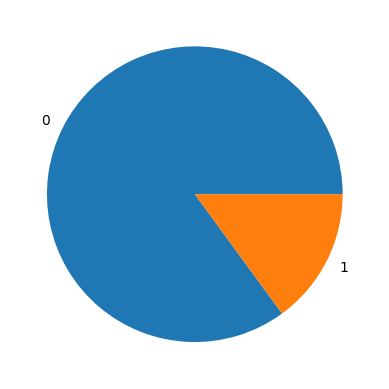

In [38]:
plt.pie(x=df['booking_complete'].value_counts(),labels=df['booking_complete'].unique())

Text(0, 0.5, 'Total')

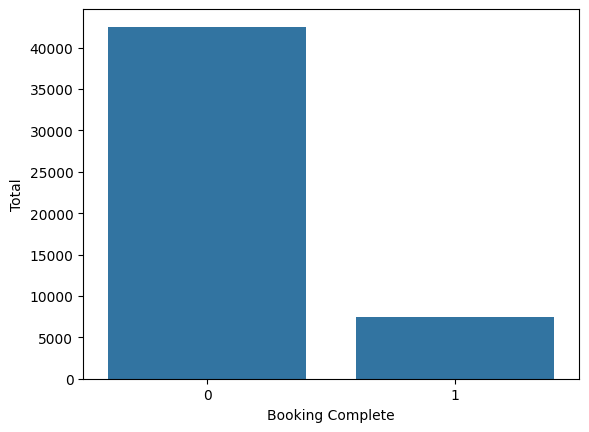

In [36]:
sns.barplot(x=df['booking_complete'].unique(), y=df['booking_complete'].value_counts())
plt.xlabel('Booking Complete')
plt.ylabel('Total')

In [21]:
from sklearn.preprocessing import LabelEncoder
## Data preprocessing

boolean_columns  = ['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals']
object_columns = ['sales_channel','trip_type','flight_day','route','booking_origin']

df[boolean_columns] = df[boolean_columns].astype(bool)

# Convert object columns to numeric using label encoding
label_encoder = LabelEncoder()
for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int32  
 2   trip_type              50000 non-null  int32  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int32  
 7   route                  50000 non-null  int32  
 8   booking_origin         50000 non-null  int32  
 9   wants_extra_baggage    50000 non-null  bool   
 10  wants_preferred_seat   50000 non-null  bool   
 11  wants_in_flight_meals  50000 non-null  bool   
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: bool(3), float64(1), int32(5), int64(5)
memory usag

## Modeling

In [22]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [25]:
best_estimator.fit(x_train, y_train)

#Predict
y_pred = best_estimator.predict(x_test)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report with precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8567
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.60      0.09      0.16      1480

    accuracy                           0.86     10000
   macro avg       0.73      0.54      0.54     10000
weighted avg       0.82      0.86      0.81     10000



In [28]:
featurne_impt = best_estimator.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame(
    {'Feature': x_train.columns, 'Importance': featurne_impt})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False)

# Print the sorted DataFrame
feature_importance_df

,Feature,Importance
3,purchase_lead,0.182768
7,route,0.152830
5,flight_hour,0.133935
4,length_of_stay,0.124983
8,booking_origin,0.123014
6,flight_day,0.087714
12,flight_duration,0.073323
0,num_passengers,0.048239
11,wants_in_flight_meals,0.022239
10,wants_preferred_seat,0.018209


C:\Users\ptrir\AppData\Local\Temp\ipykernel_25748\2630796819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature',


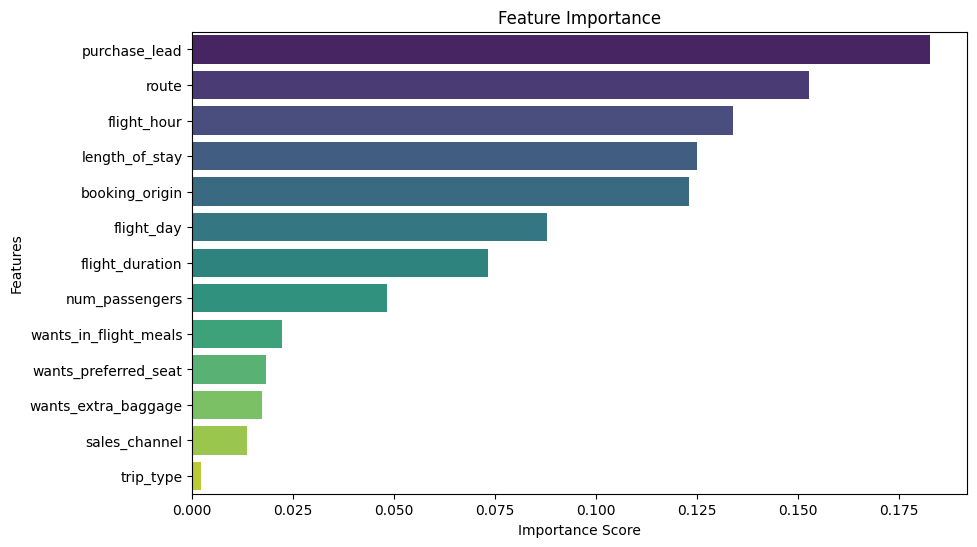

In [30]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance_df, palette='viridis')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

#### Modeling with one hot encoding

In [47]:
## Mappping Flight Day

mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [49]:
## Delete Unused column
df.drop(labels='route', axis=1, inplace=True)

In [54]:
from sklearn.preprocessing import OneHotEncoder
object_columns = ['sales_channel', 'trip_type','booking_origin']
category_data = df[object_columns]
encoder = OneHotEncoder()
onehot_encoded = encoder.fit_transform(category_data)

# Convert the result to a DataFrame
df_encoded = pd.DataFrame(onehot_encoded.toarray(
), columns=encoder.get_feature_names_out(object_columns))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_final = pd.concat([df.drop(columns=object_columns), df_encoded], axis=1)
df_final.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,112,20,3,6,0,0,0,5.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,243,22,17,3,1,1,0,5.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,96,31,4,6,0,0,1,5.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,68,22,15,3,1,0,1,5.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
x = df_final.drop(labels='booking_complete', axis=1)
y = df_final['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

best_estimator.fit(x_train, y_train)

y_pred_onehot = best_estimator.predict(x_test)
accuracy_onehot = accuracy_score(y_test, y_pred_onehot)
# Print classification report with precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred_onehot))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.04      0.08      1480

    accuracy                           0.85     10000
   macro avg       0.71      0.52      0.50     10000
weighted avg       0.81      0.85      0.80     10000



In [58]:
featurne_impt = best_estimator.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame(
    {'Feature': x_train.columns, 'Importance': featurne_impt})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False)

# Print the sorted DataFrame
feature_importance_df

,Feature,Importance
1,purchase_lead,0.195915
2,length_of_stay,0.146846
3,flight_hour,0.144588
8,flight_duration,0.102289
4,flight_day,0.090434
...,...,...
82,booking_origin_Papua New Guinea,0.000000
81,booking_origin_Panama,0.000000
27,booking_origin_Bulgaria,0.000000
22,booking_origin_Belarus,0.000000


C:\Users\ptrir\AppData\Local\Temp\ipykernel_25748\1731210321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature',


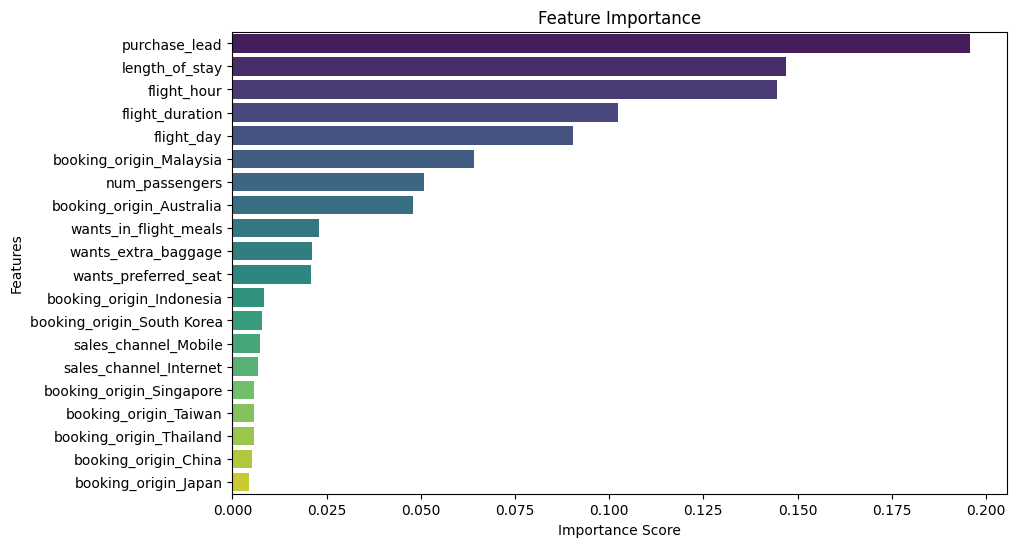

In [61]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance_df.iloc[:20], palette='viridis')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()